## Background selection SELF
You are given 2D "signal" and 2D "signal + background". You need to:
1. Construct a generative model
2. Plot the definetely identified background (p_background > 0.9) 
3. Plot likelihood histogram for signal candidates (p_background < 0.9)

In case your model runs too slow, feel free to use a subsample.

In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GMM
%matplotlib inline

In [70]:
signal = np.load("../../day_1/basic_seminars/signal.npy")
dfsig = pd.DataFrame(signal)
mix = np.load("../../day_1/basic_seminars/mix.npy")
dfmix = pd.DataFrame(mix)

print("signal df")
dfsig.describe()


signal df


,0,1
count,10000.000000,10000.000000
mean,0.002607,0.007828
std,1.003134,1.001492
min,-5.580870,-4.618416
25%,-0.505662,-0.592148
50%,0.071986,-0.065761
75%,0.609068,0.492870
max,4.055250,6.095651


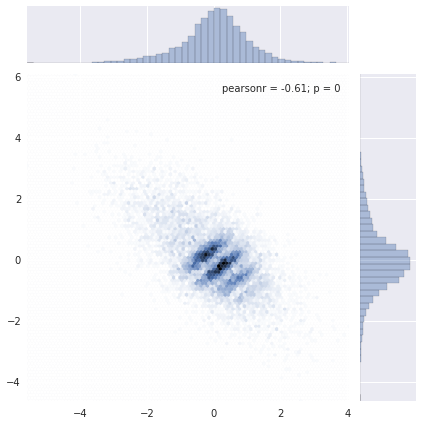

In [71]:
sns.jointplot(signal[:, 0], signal[:, 1], kind='hex');


<matplotlib.colorbar.Colorbar instance at 0x7fe953a09878>

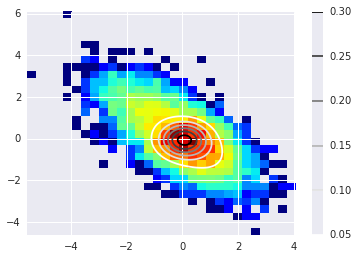

In [85]:
from matplotlib.colors import LogNorm
ax = plt.hist2d(dfsig[0],dfsig[1], bins=[30,30], cmap='jet', norm=LogNorm())

clf = GMM(4, n_iter=500, random_state=3, n_init=10).fit(signal)
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)

X, Y = np.meshgrid(x, y)                  # make duplicate rows of x, cols of y 
XX = np.array([X.ravel(), Y.ravel()]).T   # X matrix into row, Y matrix into row
Z = np.exp(clf.score(XX))                 # then transpose to get y with every x   
Z = Z.reshape(X.shape)                  
plt.contour(X,Y,Z, axes=ax)
plt.colorbar()

[-3.51701548 -1.79088735 -1.22617501 ..., -2.05063968 -4.76063063
 -2.12800048]
[ 0.00214054  0.06604399  0.87229971  0.05951576]


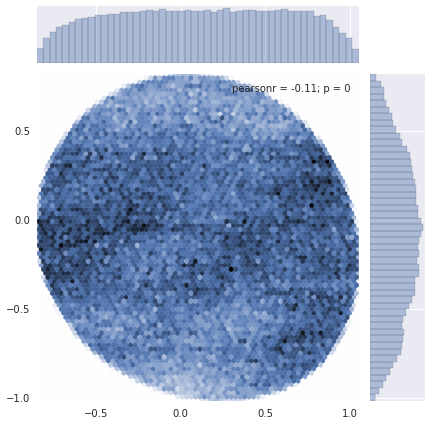

In [93]:
log_likelihood = clf.score_samples(dfmix)
print(log_likelihood[0])                  # log probabilities
print(log_likelihood[1][0])               # prob of belonging to dist i
log_likelihood = log_likelihood[0]        # take log prob 
pmix = np.exp(log_likelihood)             # convert to prob
s = pmix > 0.1                            # boolean array, pass cut?
sns.jointplot(mix[s, 0], mix[s, 1], kind='hex');

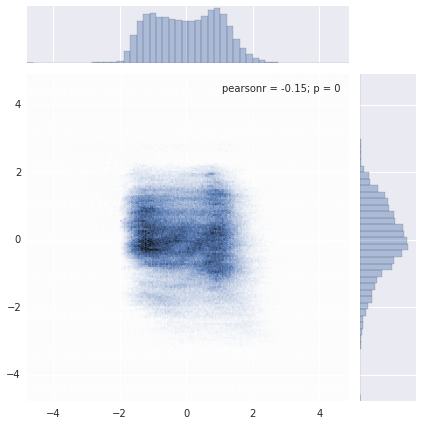

In [11]:
sns.jointplot(mix[:, 0], mix[:, 1], kind='hex');